In [36]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

O MNIST é uma base de imagens que contém 10 classes referentes a dígitos manuscritos. As imagens dessa base são binárias (preto e branco) e possuem dimensão 28x28, conforme Figura abaixo. Além disso, ao todo a base divide-se em 60.000 imagens de treino e 10.000 imagens de teste. O MNIST é uma base comumente utilizada para avaliar a performance de redes neurais, alcançando uma acurácia de 99.25% em arquiteturas simples de redes neurais convolucionais (CNNs). 

Dessa forma, esse notebook introduz como implementar CNNs no Keras utilizando o MNIST como base de imagens, tendo-se como passos principais:

* Leitura e visualização da base
* Adaptação da base para o modelo Keras 
* Criação do modelo da arquitetura no Keras 
* Treinamento
* Teste

![alt text](imgs/mninst.png "Title")

### Leitura e Visualização da base


O Keras possui a base do MNIST, para utilizá-la basta importar o dataset mnist e chamar a função load_data(). A função retornará separadamente a entrada e as classes para treinamento (x_train e y_train), assim como aa entrada e classes para o teste (x_test, y_test). Para visualizar a base, pode-se utilizar o matplotlib. É comum também, após a leitura, normalizar a base dividindo-a por 255. 

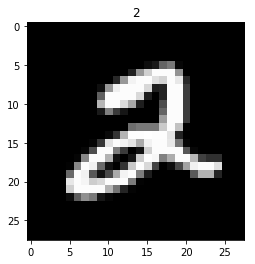

In [23]:
### leitura do dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
### Visualizar instâncias
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])
### Normalizar
x_train = x_train/255
x_test =  x_test/255

### Adaptação da base para o modelo Keras 

O Keras utiliza as imagens de entrada no formato [quantidade de instancias da base, width, height, quantidade de canais] para o tensorflow, ao utilizar Theano no keras, as entradas devem ter o formato [quantidade de instancias da base, quantidade de canais, width, height]. Dessa forma, antes de criar o modelo, utiliza-se a função reshape para cada base de entrada individualmente (x_train e x_test). Nesse exemplo, a quantidade de instancias é igual a 60.000 para treino e 10.000 para teste, tais valores podem ser obtidos utilizando .shape[0].

Além disso, os rótulos y_train e y_test devem ser convertidos para matrizes, uma vez que são tidos apenas como vetor inicialmente. Isso pode ser feito utilizando conversão one-hot encoding ou to_categorical.


In [24]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'Quantidade de instancias para treino')
print(x_test.shape[0], 'Quantidade de instancias para teste')

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



x_train shape: (60000, 28, 28)
60000 Quantidade de instancias para treino
10000 Quantidade de instancias para teste


### Criação do modelo CNN

A arquitetura CNN é inicializada no Keras utilizando o método Sequential(), após isso, cada camada da rede será adicionada sequencialmente utilizando add. Dessa forma, para implementar a LeNet no MNIST, adiciona-se duas camadas convolucionais com quantidade de filtros 6 e 16 respectivamente, cada uma seguida por uma camada pooling. Por fim, a rede possui 3 camadas Dense (completamente conectadas) com 120, 84 e 10 neuronios cada.

![alt text](imgs/LeNet-5-structure.png "Title")

Além disso, em CNNs mais recentes comumente utilizam MaxPooling, função de ativação ReLU e técnicas de regularização como Dropout e normalização do Batch.

In [37]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Treinamento

Uma vez definida a arquitetura da rede, utiliza-se os métodos do Keras compile e fit para realizar o treinamento. O compile definirá métricas (e.g. acurácia) e otimizar que será utilizado. A escolha do otimizador varia de acordo com o problema e pode levar a diferentes resultados, conforme Figura abaixo.

![alt text](imgs/otimizadores.gif "Title")

Por fim, na função fit define-se o tamanho do batch, quantidade de epochs e os dados de validação da rede. O Keras permite obter a base de validação a partir da base de treino utilizando-se o parametro validation_split.


In [38]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 628us/step - loss: 0.1702 - acc: 0.9481 - val_loss: 0.0673 - val_acc: 0.9797
Epoch 2/10
48000/48000 [==============================] - 30s 616us/step - loss: 0.0505 - acc: 0.9848 - val_loss: 0.0539 - val_acc: 0.9828
Epoch 3/10
48000/48000 [==============================] - 26s 542us/step - loss: 0.0307 - acc: 0.9901 - val_loss: 0.0473 - val_acc: 0.9852
Epoch 4/10
48000/48000 [==============================] - 28s 584us/step - loss: 0.0222 - acc: 0.9928 - val_loss: 0.0445 - val_acc: 0.9867
Epoch 5/10
48000/48000 [==============================] - 27s 556us/step - loss: 0.0160 - acc: 0.9946 - val_loss: 0.0538 - val_acc: 0.9850
Epoch 6/10
48000/48000 [==============================] - 28s 581us/step - loss: 0.0129 - acc: 0.9958 - val_loss: 0.0523 - val_acc: 0.9860
Epoch 7/10
48000/48000 [==============================] - 27s 556us/step - loss: 0.0102 - acc: 0.9964 - val_loss: 0.

### Teste

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06170223154023606
Test accuracy: 0.9833
